In [175]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [176]:
def getCoinList():
    req = requests.get('https://www.cryptocompare.com/api/data/coinlist/').json()
    info = req['Data']
    coinList = pd.DataFrame(info)
    coinList = coinList.transpose()
    coinList.to_csv('coinList.csv')
    return coinList

In [177]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df.to_csv(symbol + '.csv')
    return df

In [178]:
dfBTC = daily_price_historical('BTC','USD')
dfETH = daily_price_historical('ETH','USD')


In [179]:
dfETH.head()

,close,high,low,open,time,volumefrom,volumeto,timestamp
0,3.00,3.0,0.6747,0.6747,1438905600,123.93,371.79,2015-08-07
1,1.20,3.0,0.1500,3.0000,1438992000,2119.43,1438.16,2015-08-08
2,1.20,1.2,1.2000,1.2000,1439078400,0.00,0.00,2015-08-09
3,1.20,1.2,1.2000,1.2000,1439164800,0.00,0.00,2015-08-10
4,0.99,1.2,0.6504,1.2000,1439251200,9486.09,7419.73,2015-08-11


In [228]:

def load_Data_btc():
    dfY = dfBTC[(dfBTC.timestamp >= '2018-01-01') & (dfBTC.timestamp <= '2018-01-31')]
    dfX = pd.read_csv("index.csv")
    dfX = dfX[(dfX.Date >= '2018-01-01') & (dfX.Date <= '2018-01-31')]
    
    
    # calculate returns.
    x_data = (dfX["Close"] - dfX["Open"])*100/ dfX["Open"]
    y_data = (dfY["close"] - dfY["open"])*100/ dfY["open"]
    
    #X_trainset, X_testset, y_trainset, y_testset = train_test_split(x_data.reshape(1,-1), y_data.reshape(1,-1), test_size=0.3, random_state=7)
    return x_data,y_data
    #print(y_data.head() , x_data.head())


In [330]:
def regressSKLearn(x_data,y_data):
   
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    x_train = x_data[0:15]
    y_train = y_data[0:15]
    x_test = x_data[15:30]
    y_test = y_data[15:30]

    regr.fit(x_train.values.reshape(1,-1),y_train.values.reshape(1,-1))
    #print('Coefficients: \n', regr.coef_)
    #print(x_data.size,y_data.size);
    #print(x_data.values.reshape(1,-1).size,y_data.values.reshape(1,-1).size)
    #x_d1 = x_data[0:30]
    #y_d1 = y_data[0:30]
    #print(x_d1.size,y_d1.size)
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x_test.values.reshape(1,-1), 
             regr.predict(x_test.values.reshape(1,-1)), "ro",color="orange")
    #print(x_test.values.reshape(1,-1).shape,x_test.values.reshape(1,-1))
    print(regr.predict(x_test.values.reshape(1,-1)))
    plt.show()

[[ -2.92848845   9.73790766   2.72826043   0.1556429   11.69097923
    1.28306151  -5.51014586  -7.71549137  -3.38985201   3.11996953
  -10.80603953   4.0060685    2.90386881  -4.25080665  -0.04875856]]


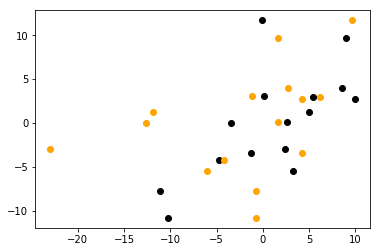

In [336]:
regressSKLearn(*load_Data_btc())